## imports & load data

In [1]:
# clone the repo the access example data
! git clone https://github.com/lucasessmann/DyadicInteractions.git

Cloning into 'DyadicInteractions'...
remote: Enumerating objects: 415, done.
remote: Counting objects: 100% (415/415), done.
remote: Compressing objects: 100% (342/342), done.
remote: Total 6626 (delta 259), reused 224 (delta 71), pack-reused 6211
Receiving objects: 100% (6626/6626), 5.12 MiB | 19.64 MiB/s, done.
Resolving deltas: 100% (4229/4229), done.


In [2]:
# import stuff
import matplotlib.pyplot as plt
import json
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

In [12]:
# define paths
data_dir = "/content/DyadicInteractions/ExampleData/Screen Data"
path_dict = {"sub1": data_dir + "/sub_Dirk_2/sub_Dirk_2_trial_10.json",
             "sub2":data_dir + "/sub_Hendrik_2/sub_Hendrik_2_trial_10.json"}

In [13]:
# load the data from both subjects
data = {}
for sub_id, file_path in path_dict.items():
  with open(file_path) as fid:
    data[sub_id] = json.load(fid)

data["sub1"].keys()

dict_keys(['subID', 'condition', 'currentTrial', 'targetPresent', 'stimuliSize', 'targetObjectPos', 'trialAnswer', 'lastReactionTime', 'index', 'remoteGazePos', 'localGazePos', 'runTime', 'sysTime'])

## 1 subject

Check measurement latency

Text(0, 0.5, 'Latency (t) - (t-1) in seconds')

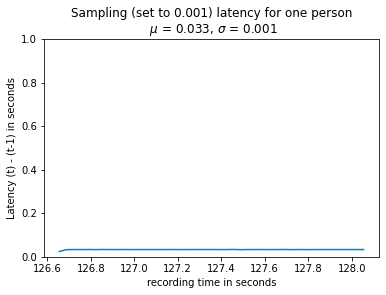

In [14]:
times = np.array(data["sub1"]["runTime"])
latencies = times[1:] - times[:-1]

plt.plot(times[1:], latencies)
plt.ylim([0, 1])
plt.title("Sampling (set to 0.001) latency for one person\n $\mu$ = {0:.3f}, $\sigma$ = {1:.3f}".format(np.mean(latencies), np.std(latencies)))
plt.xlabel("recording time in seconds")
plt.ylabel("Latency (t) - (t-1) in seconds")

Look at gaze trajectories in 2D

Text(0.5, 1.0, '2D Gaze Sphere Positions')

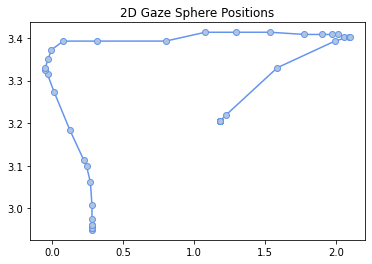

In [15]:
x = [item["x"] for item in data["sub1"]["localGazePos"]]
y = [item["y"] for item in data["sub1"]["localGazePos"]]
z = [item["z"] for item in data["sub1"]["localGazePos"]]

# Plot non-ordered points
plt.plot(x, y, marker="o", markerfacecolor="lightsteelblue", color="cornflowerblue")
plt.title("2D Gaze Sphere Positions")

Gaze trajectories in 3D

Text(0.5, 0.92, '3D Gaze Sphere Positions')

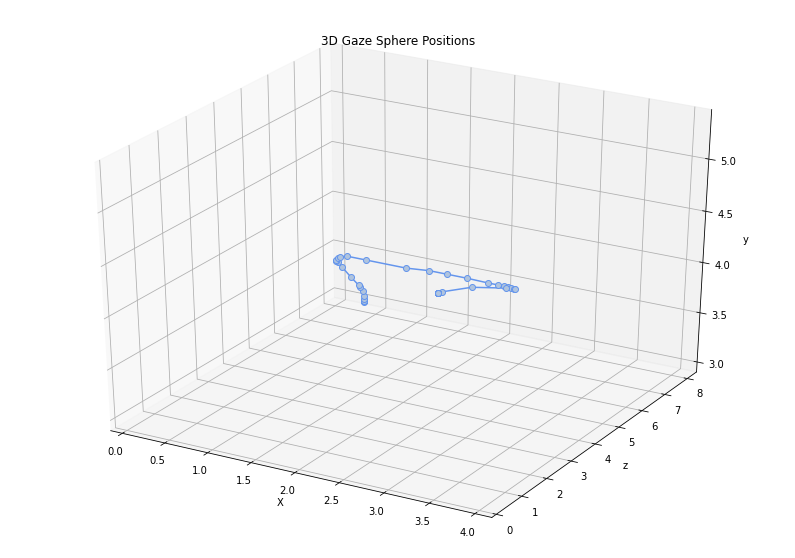

In [16]:

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, z, y, marker="o", markerfacecolor="lightsteelblue", color="cornflowerblue")
ax.set_xlabel("X")
ax.set_xlim([np.min(x), np.max(x) + 2])
ax.set_ylim([0, np.max(z)])
ax.set_ylabel("z")
ax.set_zlabel("y")
ax.set_zlim([np.min(y), np.max(y) + 2])
plt.title("3D Gaze Sphere Positions")

## 2 Subjects

Check latency between two subjects

Text(0, 0.5, 'Latency (t) - (t-1) in seconds')

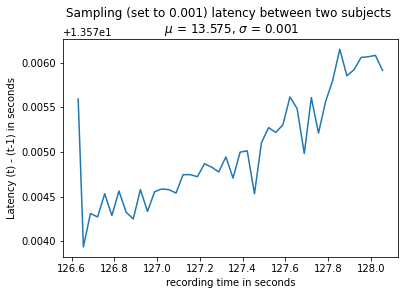

In [18]:
times = data["sub1"]["runTime"]
latencies = np.array(data["sub2"]["runTime"]) - np.array(times)

plt.plot(times, latencies)
#plt.ylim([0, 1])
plt.title("Sampling (set to 0.001) latency between two subjects \n $\mu$ = {0:.3f}, $\sigma$ = {1:.3f}".format(np.mean(latencies), np.std(latencies)))
plt.xlabel("recording time in seconds")
plt.ylabel("Latency (t) - (t-1) in seconds")

Plot 3D trajectories for 2 subjects

Text(0.5, 0.92, '3D Gaze Sphere Positions')

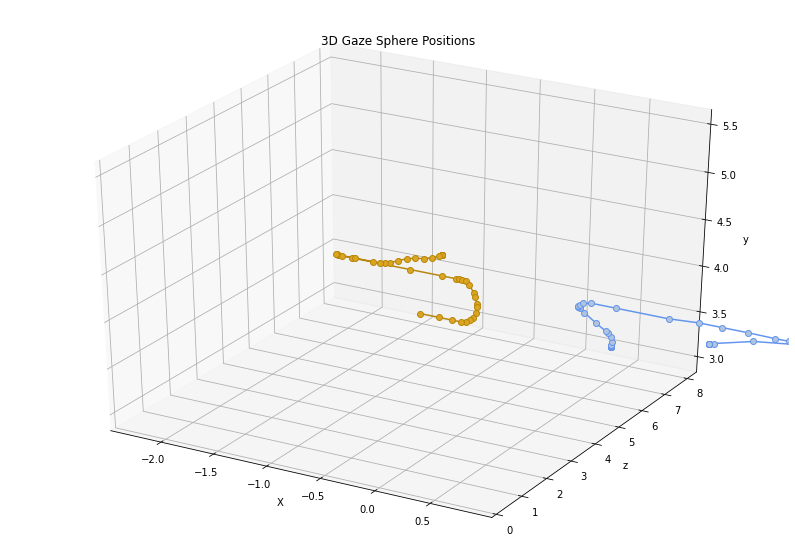

In [19]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

colors = [("lightsteelblue", "cornflowerblue"),
          ("goldenrod", "darkgoldenrod")]

for idx, sub_id in enumerate(data.keys()):
  x = [item["x"] for item in data[sub_id]["localGazePos"]]
  y = [item["y"] for item in data[sub_id]["localGazePos"]]
  z = [item["z"] for item in data[sub_id]["localGazePos"]]

  ax.plot(x, z, y, marker="o", markerfacecolor=colors[idx][0], color=colors[idx][1])

ax.set_xlabel("X")
ax.set_xlim([np.min(x), np.max(x) + 2])
ax.set_ylim([0, np.max(z)])
ax.set_ylabel("z")
ax.set_zlabel("y")
ax.set_zlim([np.min(y), np.max(y) + 2])
plt.title("3D Gaze Sphere Positions")